http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [48]:
from __future__ import print_function, division
from scipy import stats
from estimation import RMSE, MeanError

%matplotlib inline

import numpy as np
import pandas as pd

import nsfg
import random
import first
import thinkstats2
import thinkplot
import math
import scipy
import estimation

## Exercise 7.1

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

In [49]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [50]:
bins = np.arange(10, 48, 3)
indices = np.digitize(live.agepreg, bins)
groups = live.groupby(indices)

In [51]:
ages = [group.agepreg.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

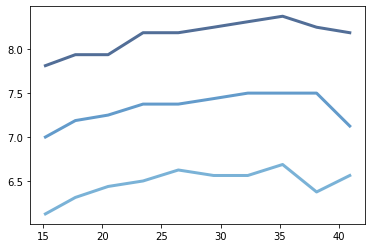

In [52]:
for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

In [53]:
ages = live.agepreg
weights = live.totalwgt_lb
print('Correlation', thinkstats2.Corr(ages, weights))
print('Spearman Correlation', thinkstats2.SpearmanCorr(ages, weights))

Correlation 0.06883397035410904
Spearman Correlation 0.09461004109658226


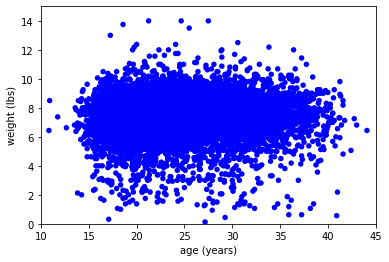

In [54]:
thinkplot.Scatter(ages, weights, alpha=1)
thinkplot.Config(xlabel='age (years)', 
                 ylabel='weight (lbs)',
                 xlim=[10, 45],
                 ylim=[0, 15],
                 legend=False)

    Conclusion: The scatter shows that the relationship between weight and ages leans more to random. In addition the correlation is to be at 0.0688 and Pearson at 0.094 which contributes to the analysis that the relationships are more scattered.

## Exercise 8.1

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [61]:
def estimate1(n=7, iters=100000):
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('xbar error', MeanError(means, mu))
    print('median error', MeanError(medians, mu))

In [62]:
estimate1()

xbar error -0.0009241772858517062
median error -0.0022670539945289026


In [63]:
def estimate2(n=7, iters=100000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

In [64]:
estimate2()

RMSE biased 0.5152727399094843
RMSE unbiased 0.5776261519046837


## Exercise 8.2

In [75]:
def SimulateSample(lam=2, n=10, iters=1000):
    estimates = []
    for j in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    con = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', con)
    thinkplot.Plot((con[0], con[0]), [0, 1])
    thinkplot.Plot((con[1], con[1]), [0, 1])
    thinkplot.Cdf(cdf)

standard error 0.7794846856693128
confidence interval (1.2203370567692582, 3.688422982073375)


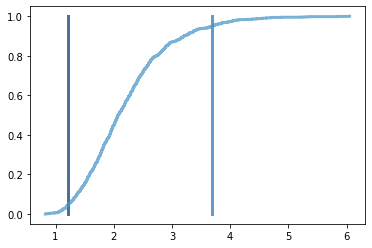

In [76]:
SimulateSample()